In [2]:
import pandas as pd
import os

In [3]:
method = 'aicso2'
categories = 'o2o'
horizon = 1
train_days = 60
val_days = 5
model_name = 'sac_base'
env_name = 'hedge031'
code = 'IM'
direction = 'long'

In [4]:
def fetch(index):
    dirs = os.path.join(
    './record', 'agent', method, 'g_instruments', 'rolling', 'normal_factors3',
    str(train_days), str(val_days), "{0}_{1}".format(categories, str(horizon)),
    str(index), "{0}_{1}_{2}_{3}".format(model_name, env_name, code,
                                         str(direction)))
    filename = os.path.join(dirs, "{0}_{1}_profit.feather".format(index, 'best_model'))
    return pd.read_feather(filename)

In [11]:
profit46 = fetch(46)
#profit49 = fetch(49)
profit46

,trade_time,profit
0,2024-12-30 09:35:00,-0.000088
1,2024-12-30 09:36:00,-0.004542
2,2024-12-30 09:37:00,0.001149
3,2024-12-30 09:38:00,-0.000492
4,2024-12-30 09:39:00,0.000656
...,...,...
1435,2025-01-07 14:55:00,0.000000
1436,2025-01-07 14:56:00,0.000000
1437,2025-01-07 14:57:00,0.000189
1438,2025-01-07 14:58:00,0.000317


In [8]:
profit = pd.concat([profit46], axis=0)

In [9]:
profit['trade_date'] = pd.to_datetime(profit['trade_time']).dt.strftime('%Y-%m-%d')
m1 = profit.groupby('trade_date')['profit'].sum().reset_index()

<Axes: xlabel='trade_date'>

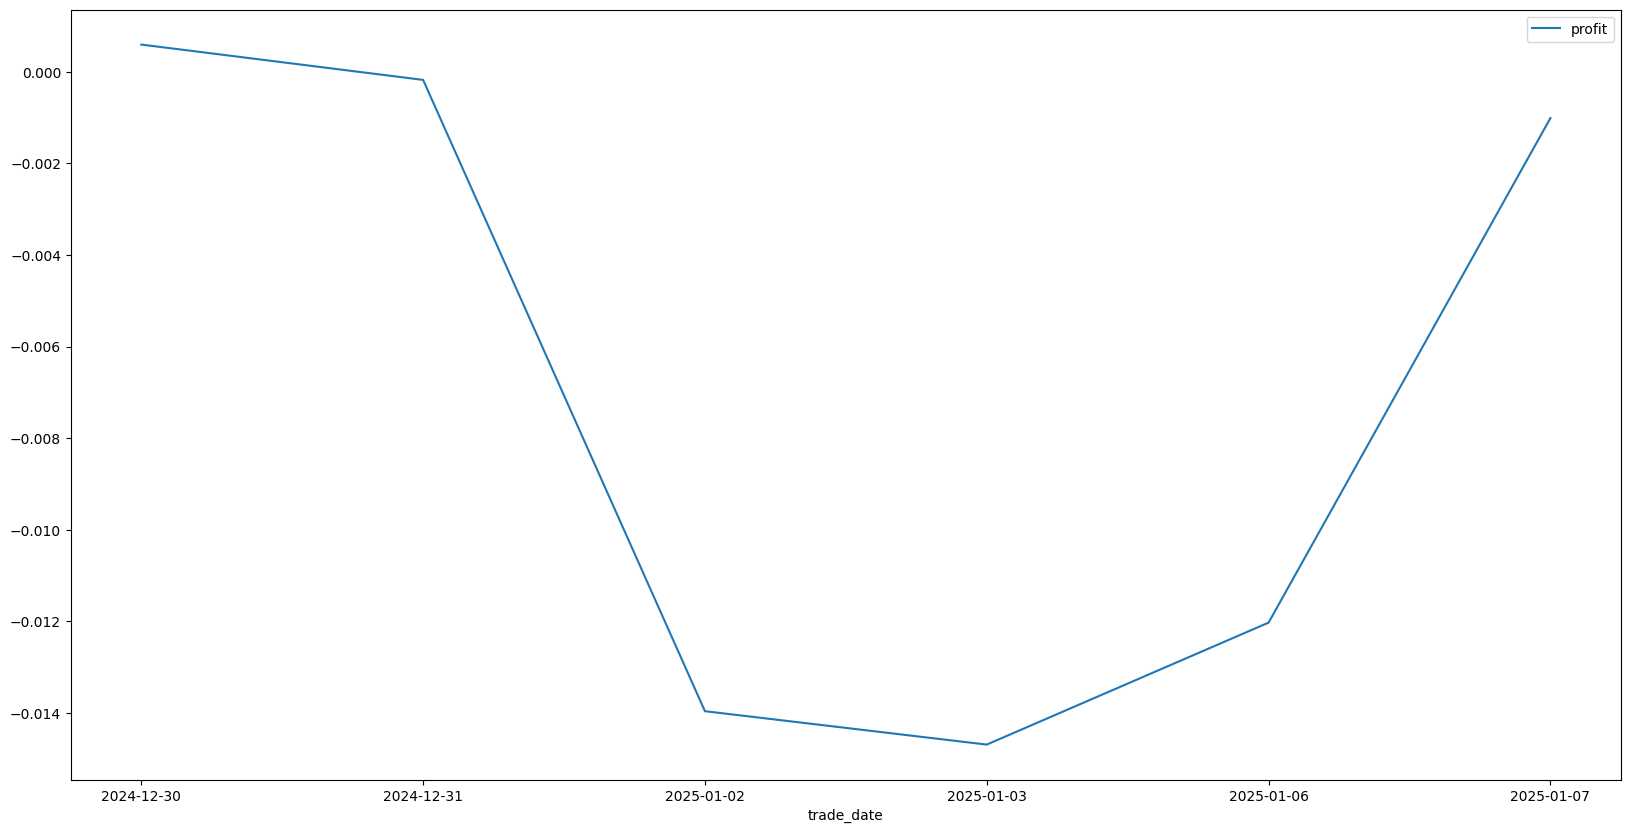

In [10]:
m1.set_index('trade_date').cumsum().plot(figsize=(20, 10))

In [18]:
m1

,trade_date,profit
0,2025-01-14,11698.103671
1,2025-01-15,808.859203
2,2025-01-16,3834.599257
3,2025-01-17,13451.931078
4,2025-01-20,5601.505360
5,2025-01-21,3477.533539
6,2025-01-22,-9804.655059
7,2025-01-23,6273.452602
8,2025-01-24,21105.574108
9,2025-01-27,-14101.582421
